<a href="https://colab.research.google.com/github/skywalker0803r/c620/blob/main/notebook/%E4%BF%AE%E6%AD%A3%E6%A8%A1%E7%B5%84%E6%B8%AC%E8%A9%A6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/skywalker0803r/c620.git
!pip install autorch > log.txt
!pip install optuna > log.txt

Cloning into 'c620'...
remote: Enumerating objects: 2032, done.
remote: Counting objects: 100% (850/850), done.
remote: Compressing objects: 100% (392/392), done.
remote: Total 2032 (delta 554), reused 686 (delta 449), pack-reused 1182
Receiving objects: 100% (2032/2032), 48.01 MiB | 30.14 MiB/s, done.
Resolving deltas: 100% (1332/1332), done.


# import

In [2]:
from c620.FV2 import AllSystem
import torch
from c620.configV2 import config
import joblib
import numpy as np
import pandas as pd
import os
os.chdir('/content/c620')
print(os.getcwd())
!git pull

/content/c620
Already up to date.


# data

In [3]:
demo = joblib.load('data/demo(real_data).pkl')
print(demo.keys())
icg_input = demo['icg_input']
c620_feed = demo['c620_feed']
t651_feed = demo['t651_feed']
print(icg_input.shape)
icg_input.head()

dict_keys(['icg_input', 'c620_feed', 't651_feed', 'c620_op', 'c660_op', 'c670_op', 'c620_wt', 'c660_wt', 'c670_wt'])
(168, 17)


,Simulation Case Conditions_Feed Rate_Feed from V615 Btm_m3/hr,Simulation Case Conditions_Feed Rate_Feed from V615 Btm NA_wt%,Simulation Case Conditions_Feed Rate_Feed from V615 Btm Benzene_wt%,Simulation Case Conditions_Feed Rate_Feed from V615 Btm Toluene_wt%,Simulation Case Conditions_Feed Rate_Feed from C820 Dist_m3/hr,Simulation Case Conditions_Feed Rate_Feed from C820 Dist NA_wt%,Simulation Case Conditions_Feed Rate_Feed from C820 Dist Benzene_wt%,Simulation Case Conditions_Feed Rate_Feed from C820 Dist Toluene_wt%,Simulation Case Conditions_Feed Rate_Feed from T651_m3/hr,Simulation Case Conditions_Feed Rate_Feed from T651 NA_wt%,Simulation Case Conditions_Feed Rate_Feed from T651 Benzene_wt%,Simulation Case Conditions_Feed Rate_Feed from T651 Toluene_wt%,Simulation Case Conditions_Spec 1 : Benzene in C620 Sidedraw_wt%,Simulation Case Conditions_Spec 2 : NA in Benzene_ppmw,Tatoray Stripper C620 Operation_Specifications_Spec 2 : Distillate Rate_m3/hr,Benzene Column C660 Operation_Specifications_Spec 3 : Toluene in Benzene_ppmw,Tatoray Stripper C620 Operation_Specifications_Spec 1 : Receiver Temp_oC
2021-02-13,182.727005,2.060,11.670,37.270,17.901134,2.370,68.700,21.000,98.045372,0.6650,43.532,42.478,87.140,838.0,0.0,29.0,40.842743
2021-02-05,179.608627,2.165,12.377,38.074,18.646059,3.088,66.645,22.216,96.942879,0.7025,43.370,42.201,85.878,800.0,0.0,16.0,40.885593
2020-12-04,166.107956,2.151,12.047,37.287,19.038383,3.474,65.729,19.557,99.873688,0.6486,43.878,42.602,86.102,805.0,0.0,35.0,39.059292
2020-11-26,169.727284,1.360,12.000,37.630,18.240871,3.000,66.560,21.430,92.989864,0.6610,43.786,41.398,86.390,749.0,0.0,19.0,41.073098
2020-11-16,176.370055,1.837,11.857,37.198,17.663765,2.622,66.132,21.395,98.291358,0.5919,44.655,42.658,92.836,738.0,0.0,32.0,43.761401


In [4]:
f = AllSystem(config)

In [5]:
c620_wt,c620_op,c660_wt,c660_op,c670_wt,c670_op = f.inference(demo['icg_input'],demo['c620_feed'],demo['t651_feed'],real_data_mode=True)

In [6]:
c620_op_col = demo['c620_op'].dropna(axis=1).columns
f.c670_M.show_metrics(c620_op[c620_op_col],demo['c620_op'][c620_op_col])

,R2,MSE,MAPE
Density_Feed Properties,0,0.219179,151.535
Density_Vent Gas Production Rate and Composition,0,0.011718,25.3619
Density_Distillate Production Rate and Composition,0,0.0885569,21.4776
Density_Sidedraw Production Rate and Composition,0,0.0746075,26.2665
Density_Bottoms Production Rate and Composition,0,0.0923058,16.5333
Tatoray Stripper C620 Operation_Yield Summary_Reflux Rate_m3/hr,0,25.4567,3.50617
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 14 (Control)_oC,0,12.5364,1.54482
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 34 (Control)_oC,0,5.58164,0.878579
AVG,0,5.50765,30.8879


In [7]:
c660_op_col = demo['c660_op'].dropna(axis=1).columns
f.c670_M.show_metrics(c660_op[c660_op_col],demo['c660_op'][c660_op_col])

,R2,MSE,MAPE
Density_Feed Properties,0,0.0273896,13.2857
Density_Vent Gas Production Rate and Composition,0,0.100795,32.0507
Density_Distillate (Benzene Drag) Production Rate and Composition,0,0.114775,25.3405
Density_Sidedraw (Benzene )Production Rate and Composition,0,0.0174146,16.6374
Density_Bottoms Production Rate and Composition,0,0.0251754,9.24734
Benzene Column C660 Operation_Yield Summary_Reflux Rate_m3/hr,0,113.429,7.02477
Benzene Column C660 Operation_Column Temp Profile_C660 Tray 6 (SD & Control)_oC,0,1.6214,1.09504
Benzene Column C660 Operation_Column Temp Profile_C660 Tray 23 (Control)_oC,0,3.65522,1.5623
AVG,0,14.8739,13.2805


In [8]:
c670_op_col = demo['c670_op'].dropna(axis=1).columns
f.c670_M.show_metrics(c670_op[c670_op_col],demo['c670_op'][c670_op_col])

,R2,MSE,MAPE
Density_Distillate Production Rate and Composition,0,0.054253,13.9083
Density_Bottoms Production Rate and Composition,0,0.107407,46.8046
Toluene Column C670 Operation_Yield \nSummary_Reflux Rate_m3/hr,0,165.041,3.54674
Toluene Column C670 Operation_Column Temp Profile_C670 Tray 24 (Control)_oC,0,5.80489,0.868726
Toluene Column C670 Operation_Column Temp Profile_C670 Btm Temp (Control)_oC,0,9.47953,0.8685
AVG,0,36.0974,13.1994


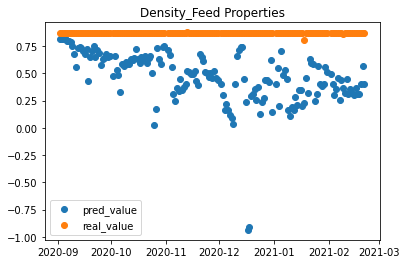

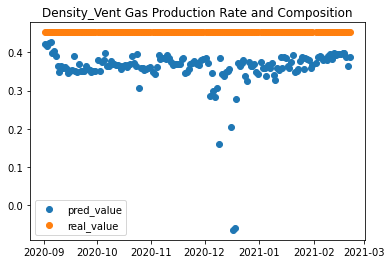

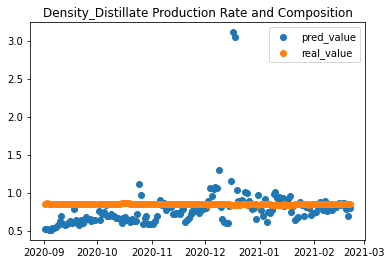

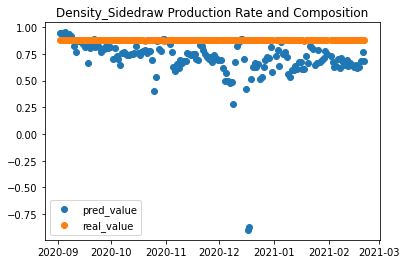

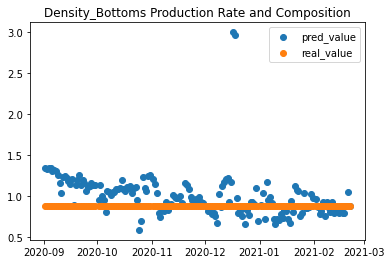

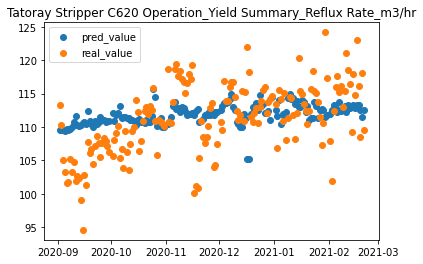

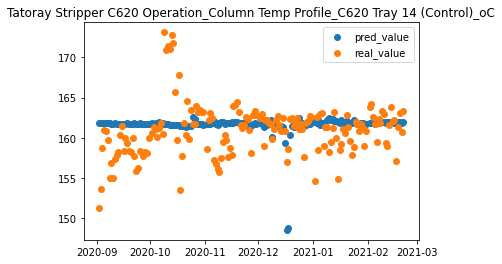

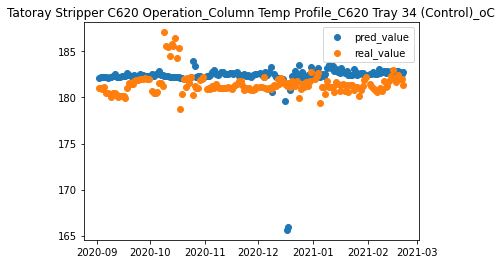

In [9]:
import matplotlib.pyplot as plt

for i in c620_op_col:
  idx = demo['icg_input'].index
  plt.scatter(idx,c620_op[i],label='pred_value')
  plt.scatter(idx,demo['c620_op'][i],label='real_value')
  plt.title(i)
  plt.legend()
  plt.show()